In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np

import math
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage

import time
import glob,os
from scipy import optimize

from scipy import ndimage as ndi

from skimage.feature import peak_local_max
from skimage import data, img_as_float
from mpl_toolkits.axes_grid1 import make_axes_locatable
import csv
import struct
import bz2
from scipy import integrate

In [156]:
path = 'D:/2020/JDDC/DeformationVisulization/10Frames_B1_sym/'
# path = 'D:/2020/JDDC/DoseTest_exp/10Frames/10Frames_B1_results/'
image = loadFromQ2bz(path + 'bump-0_003.q2bz')
defX = loadFromQ2bz(path + "bump-0_003-y_0.q2bz")
defY = loadFromQ2bz(path + "bump-0_003-y_1.q2bz")
exp = loadFromQ2bz(path + "u0_000.q2bz")
image_NRR = loadFromQ2bz('D:/2020/JDDC/DeformationVisulization/NRR_B1/average.q2bz')
image_NRR = image_NRR[56:206,51:201]
deformed_image = deformImage(image, defX, defY, order=1, mode='nearest')

# image_NRR = loadFromQ2bz('D:/2020/JDDC/DoseTest_exp/10Frames/NRR_B1/average.q2bz')
# image_NRR = image_NRR[53:203,52:202]

csvFileName = path + 'bump-0_003-centers.csv'
start = 0
with open(csvFileName) as csvfile:
    file=csv.reader(open(csvFileName,'r'))
    peaks_x = []
    peaks_y = []
    for row in file:
        if start == 0:
            start = 1
            continue
        x_cor = float(row[0])
        y_cor = float(row[1])
        if x_cor > 0 and x_cor < 145 and y_cor > 0 and y_cor < 145:
            peaks_x.append(x_cor)
            peaks_y.append(y_cor)

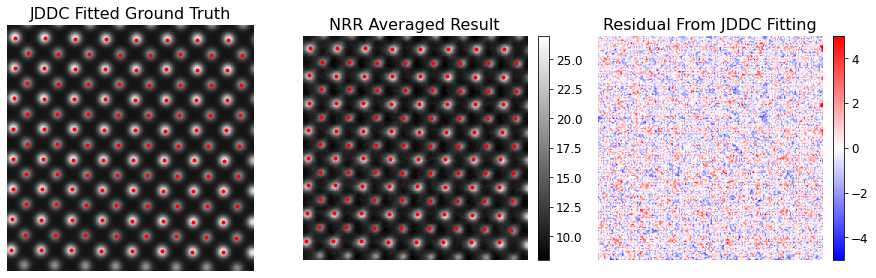

In [158]:
fig = plt.figure(figsize=[15,7])

ax = plt.subplot(131)
im = plt.imshow(image,clim=[8,27],cmap='gray')
# plt.colorbar()
plt.axis('off')
plt.scatter(np.asarray(peaks_x), np.asarray(peaks_y),color='r',s=10)
divider = make_axes_locatable(ax)
plt.title('JDDC Fitted Ground Truth',fontsize=16)

ax = plt.subplot(132)
im = plt.imshow(image_NRR,clim=[8,27],cmap='gray')
plt.axis('off')
plt.title('NRR Averaged Result',fontsize=16)
plt.scatter(np.asarray(peaks_x), np.asarray(peaks_y),color='r',s=10)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.15)
plt.colorbar(im, cax=cax)
cax.tick_params(labelsize=12)

ax = plt.subplot(133)
im = plt.imshow(exp - deformed_image,cmap='bwr',clim=[-5,5])
plt.axis('off')
plt.title('Residual From JDDC Fitting',fontsize=16)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.15)
plt.colorbar(im, cax=cax)
cax.tick_params(labelsize=12)

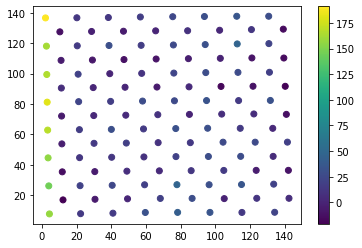

In [164]:
plt.scatter(peaks_x, peaks_y, c = np.asarray(intensity_JDDC) - np.asarray(intensity_NRR))
plt.colorbar()

In [159]:
intensity_JDDC = []
intensity_NRR = []
radius = 7
for i in range(len(peaks_x)):
    # mask center is in the order of [x,y], detected coordinates are in pair of [y,x], so it needs to be rearranged
    center = [peaks_x[i],peaks_y[i]]
    mask = create_circular_mask(image.shape[0], image.shape[1], center=center, radius=radius)
    intensity_JDDC.append(np.sum(mask * image))
    center = [peaks_x[i]-1,peaks_y[i]-1]
    mask = create_circular_mask(image.shape[0], image.shape[1], center=center, radius=radius)
    intensity_NRR.append(np.sum(mask * image_NRR))

Text(0, 0.5, 'JDDC Intensity')

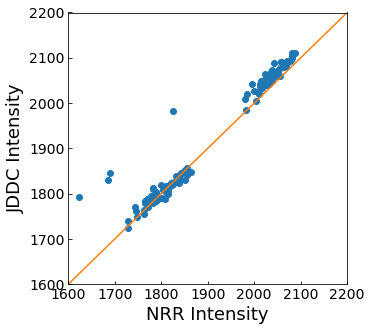

In [160]:
fig = plt.figure(figsize=[5,5])
plt.scatter(intensity_NRR, intensity_JDDC)
plt.plot(np.linspace(1600,2200,1000),np.linspace(1600,2200,1000),'-',color='#ff7f0e',linewidth=1.5)
plt.xlim([1600,2200])
plt.ylim([1600,2200])
plt.tick_params(direction='in',labelsize = 14)
plt.xlabel('NRR Intensity',fontsize=18)
plt.ylabel('JDDC Intensity',fontsize=18)

## Low dose case, 0.5 us pixel dwell time, 10 frames

In [8]:
path = 'D:/2020/JDDC/DoseTest_exp/2Frames/2Frames_B1/'
image = loadFromQ2bz(path + 'bump-0_003.q2bz')
defX = loadFromQ2bz(path + "bump-0_003-y_0.q2bz")
defY = loadFromQ2bz(path + "bump-0_003-y_1.q2bz")
exp = loadFromQ2bz(path + "u0_000.q2bz")
image_NRR = loadFromQ2bz('D:/2020/JDDC/DoseTest_exp/10Frames/NRR_B1/average.q2bz')
image_NRR = image_NRR[53:203,52:202]
deformed_image = deformImage(image, defX, defY, order=1, mode='nearest')

csvFileName = path + 'bump-0_003-centers.csv'
start = 0
with open(csvFileName) as csvfile:
    file=csv.reader(open(csvFileName,'r'))
    peaks_x = []
    peaks_y = []
    for row in file:
        if start == 0:
            start = 1
            continue
        x_cor = float(row[0])
        y_cor = float(row[1])
        if x_cor > 0 and x_cor < 145 and y_cor > 0 and y_cor < 145:
            peaks_x.append(x_cor)
            peaks_y.append(y_cor)

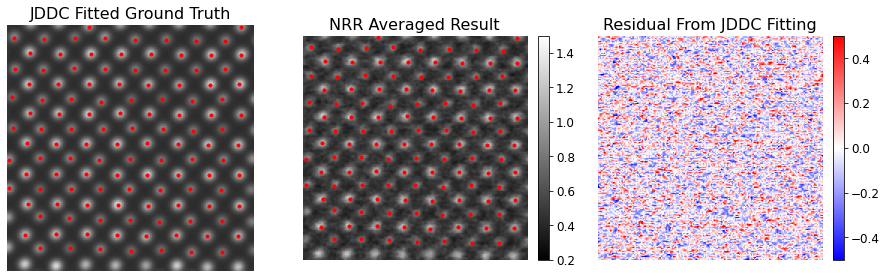

In [6]:
fig = plt.figure(figsize=[15,7])

ax = plt.subplot(131)
im = plt.imshow(image,clim=[0.2,1.5],cmap='gray')
# plt.colorbar()
plt.axis('off')
plt.scatter(np.asarray(peaks_x), np.asarray(peaks_y),color='r',s=10)
divider = make_axes_locatable(ax)
plt.title('JDDC Fitted Ground Truth',fontsize=16)

ax = plt.subplot(132)
im = plt.imshow(image_NRR,clim=[0.2,1.5],cmap='gray')
plt.axis('off')
plt.title('NRR Averaged Result',fontsize=16)
plt.scatter(np.asarray(peaks_x)+1, np.asarray(peaks_y),color='r',s=10)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.15)
plt.colorbar(im, cax=cax)
cax.tick_params(labelsize=12)

ax = plt.subplot(133)
im = plt.imshow(exp - deformed_image,cmap='bwr',clim=[-0.5,0.5])
plt.axis('off')
plt.title('Residual From JDDC Fitting',fontsize=16)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.15)
plt.colorbar(im, cax=cax)
cax.tick_params(labelsize=12)

(106.65, 136.35, 113.65, 143.35)

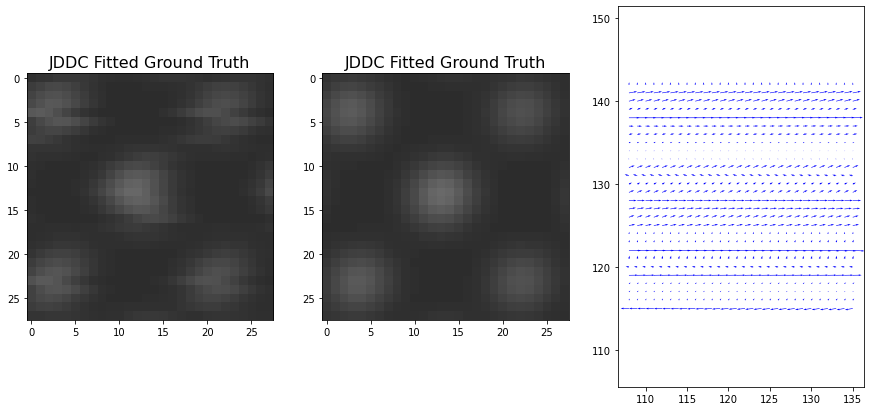

In [7]:
fig = plt.figure(figsize=[15,7])

ax = plt.subplot(131)
im = plt.imshow(deformed_image[115:143,108:136],clim=[0,2.5],cmap='gray')
# plt.axis('off')
divider = make_axes_locatable(ax)
plt.title('JDDC Fitted Ground Truth',fontsize=16)

ax = plt.subplot(132)
im = plt.imshow(image[115:143,108:136],clim=[0,2.5],cmap='gray')
# plt.axis('off')
divider = make_axes_locatable(ax)
plt.title('JDDC Fitted Ground Truth',fontsize=16)

ax = plt.subplot(133)
defX, defY = np.multiply([defX, defY], (np.max(image.shape)-1))
X, Y = np.meshgrid(np.arange(0, 150, 1), np.arange(0, 150, 1))
ax=plt.quiver(X[115:143,108:136], Y[115:143,108:136], defX[115:143,108:136], defY[115:143,108:136], color='b')
plt.axis('equal')
# plt.axis('off')

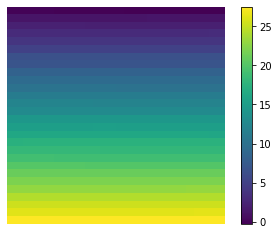

In [10]:
plt.imshow(coords[0,115:143,108:136])
plt.axis('off')
plt.colorbar()

(-0.5, 32.46192231740325, 28.90315239498138, -0.5)

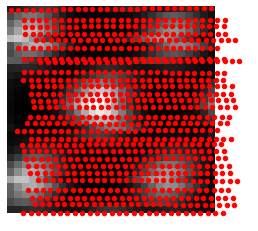

In [9]:
coords = np.mgrid[0:image.shape[0], 0:image.shape[1]] + np.multiply([defY, defX], (np.max(image.shape)-1))
plt.imshow(deformed_image[115:143,108:136],cmap='gray')
coords[0,:,:] = coords[0,:,:] - coords[0,115,108]
coords[1,:,:] = coords[1,:,:] - coords[1,115,108]
plt.scatter(coords[1,115:143,108:136],coords[0,115:143,108:136],c='r',s=20)
plt.axis('off')
# plt.imshow(coords)
# plt.xlim([0,150])
# plt.ylim([0,150])

In [39]:
intensity_JDDC = []
intensity_NRR = []
radius = 7
for i in range(len(peaks_x)):
    # mask center is in the order of [x,y], detected coordinates are in pair of [y,x], so it needs to be rearranged
    center = [peaks_x[i],peaks_y[i]]
    mask = create_circular_mask(image.shape[0], image.shape[1], center=center, radius=radius)
    intensity_JDDC.append(np.sum(mask * image))
    center = [peaks_x[i]-1,peaks_y[i]-1]
    mask = create_circular_mask(image.shape[0], image.shape[1], center=center, radius=radius)
    intensity_NRR.append(np.sum(mask * image_NRR))

Text(0, 0.5, 'JDDC Intensity')

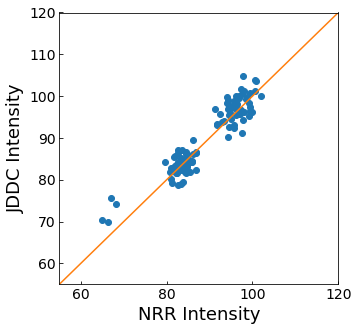

In [40]:
fig = plt.figure(figsize=[5,5])
plt.scatter(intensity_NRR, intensity_JDDC)
plt.plot(np.linspace(55,120,1000),np.linspace(55,120,1000),'-',color='#ff7f0e',linewidth=1.5)
plt.xlim([55,120])
plt.ylim([55,120])
plt.tick_params(direction='in',labelsize = 14)
plt.xlabel('NRR Intensity',fontsize=18)
plt.ylabel('JDDC Intensity',fontsize=18)

In [2]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [3]:
def loadFromQ2bz(path):
    filename, file_extension = os.path.splitext(path)

    if(file_extension == '.q2bz' or file_extension == '.bz2'):
        fid = bz2.open(path, 'rb')
    else:
        fid = open(path, 'rb')
    # Read magic number
    line = fid.readline().rstrip().decode('ascii')
    if(line[0] != 'P'):
        quit("Invalid array header, doesn't start with 'P'")
    if(line[1] != '9'):
        quit("Invalid data type, only double is supported currently")
    fid.readline().rstrip()  # Skip header

    # Read width and height
    arr = fid.readline().rstrip().split()
    width = int(arr[0])
    height = int(arr[1])

    # Read max, but be careful not to read more than one new line after max.
    # The binary data could start with a value that is equivalent to a
    # new line.
    max = ""
    while True:
        c = fid.read(1)
        if c == b'\n':
            break
        max = max + str(int(c))

    max = int(max)

    # Read image to vector
    x = np.frombuffer(fid.read(), np.float64)
    img = x.reshape(width, height)
    return img

In [4]:
def deformImage(image, displacementX, displacementY, order=1, mode='constant', cval=0.0):
    # Convert the displacement to a coordinate system
    coords = np.mgrid[0:image.shape[0], 0:image.shape[1]] \
             + np.multiply([displacementY, displacementX], (np.max(image.shape)-1))

    # Resample the image at the coordinates obtained from the displacement to deform the image
    return ndimage.map_coordinates(image, coords, order=order, mode=mode, cval=cval)